### Scraping the data from the Amazon website
This is my first webscraping project, so i build the project for step by steps. 

Install the bs4, requests, html5lib and pandas 

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [4]:
import requests

url = 'https://www.amazon.in/s?k=mobile&crid=1HG22JWSAFQXT&sprefix=%2Caps%2C455&ref=nb_sb_ss_recent_1_0_recent'
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

response = requests.get(url, headers=HEADERS)
print(response)

<Response [200]>


In [5]:
#here see the entire content of the webpage.
response.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="preconnect" href="https://images-eu.ssl-images-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://m.media-amazon.com" crossorigin>\n<link rel="preconnect" href="https://m.media-amazon.com" crossorigin>\n<link rel="dns-prefetch" href="https://completion.amazon.com" crossorigin>\n<link rel="preconnect" href="https://completion.amazon.com" crossorigin>\n<!-- sp:end-feature:cs-optimization -->\n<!-- 

In [6]:
# convert into html format.
soup = BeautifulSoup(response.content,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
  <link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
  <link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
  <link crossorigin="" href="https://completion.amazon.com" rel="preconnect"

In [9]:
links = soup.find_all('a', class_="a-link-normal s-no-outline",target="_blank")
links

[<a class="a-link-normal s-no-outline" href="/sspa/click?ie=UTF8&amp;spc=MTo3NDAzODY5NjkzMzY1MDU0OjE3MDg3NjYyOTI6c3BfYXRmOjIwMDc5NjgyODUxMTAzOjowOjo&amp;url=%2FApple-iPhone-13-128GB-Midnight%2Fdp%2FB09G9HD6PD%2Fref%3Dsr_1_1%3Fcrid%3D1HG22JWSAFQXT%26dib%3DeyJ2IjoiMSJ9.5gYFD-SBntYAHRX-6mjDARbCxLr87OCDw0xsjkf10Y7sTX1oFrFTr_npcGXP99_jt1YRPqRhT8kGjv-jC1WvUZgaJcE-Ls0did86_ICKfxCEgJgXMcUnMf4fDEftQu2IpdIvfLfMHVhzRVPR82iGs0-PeBp3hPbGIrbpxl38liIi4Bm76jykiBvqhbNPql_JvCAEdGNNjdUykZpjWjeWB9HPTXViV1yPzyQDQR5A2YY.j0LeQfq8L4bqbKwVKKxy_KEvqeQvrUAF7xuwzLlFxvg%26dib_tag%3Dse%26keywords%3Dmobile%26qid%3D1708766292%26sprefix%3D%252Caps%252C455%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1" target="_blank"><div class="a-section aok-relative s-image-fixed-height"><img alt="Sponsored Ad - Apple iPhone 13 (128GB) - Midnight" class="s-image" data-image-index="1" data-image-latency="s-product-image" data-image-load="" data-image-source-density="1" src="https://m.media-amazon.com/images/I/61VuVU94

In [10]:
href = links[0].get('href') # here get the first mobile details for using slicing method.

In [11]:
href.startswith('/')
product_list = 'https://www.amazon.in'+ href
product_list

'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo3NDAzODY5NjkzMzY1MDU0OjE3MDg3NjYyOTI6c3BfYXRmOjIwMDc5NjgyODUxMTAzOjowOjo&url=%2FApple-iPhone-13-128GB-Midnight%2Fdp%2FB09G9HD6PD%2Fref%3Dsr_1_1%3Fcrid%3D1HG22JWSAFQXT%26dib%3DeyJ2IjoiMSJ9.5gYFD-SBntYAHRX-6mjDARbCxLr87OCDw0xsjkf10Y7sTX1oFrFTr_npcGXP99_jt1YRPqRhT8kGjv-jC1WvUZgaJcE-Ls0did86_ICKfxCEgJgXMcUnMf4fDEftQu2IpdIvfLfMHVhzRVPR82iGs0-PeBp3hPbGIrbpxl38liIi4Bm76jykiBvqhbNPql_JvCAEdGNNjdUykZpjWjeWB9HPTXViV1yPzyQDQR5A2YY.j0LeQfq8L4bqbKwVKKxy_KEvqeQvrUAF7xuwzLlFxvg%26dib_tag%3Dse%26keywords%3Dmobile%26qid%3D1708766292%26sprefix%3D%252Caps%252C455%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1'

In [13]:
new_page = requests.get(product_list, headers = HEADERS)
new_page

<Response [200]>

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
  <link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
  <link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
  <link crossorigin="" href="https://completion.amazon.com" rel="preconnect"
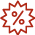
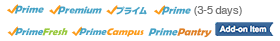

In [14]:
new_soup = BeautifulSoup(new_page.content,'html.parser')
print(new_soup.prettify())

In [40]:
Mobile_name = new_soup.find('span',attrs ={'id':"productTitle"}).text.strip()
Mobile_name

'Apple iPhone 13 (128GB) - Midnight'

In [47]:
Price = new_soup.find('span',attrs ={'class':"a-price aok-align-center reinventPricePriceToPayMargin priceToPay"}).text.strip()
Price

'₹51,790'

In [43]:
Star_rating = new_soup.find('span',attrs ={'class':"a-icon-alt"}).text
Star_rating

'4.5 out of 5 stars'

In [50]:
Count_rating =new_soup.find('span',attrs ={ 'id':"acrCustomerReviewText",'class':"a-size-base"}).text
Count_rating

'25,767 ratings'

In [51]:
Availablity = new_soup.find("div", attrs={'id':'availability'}).text.strip()
Availablity

'In stock'